In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import squidpy as sq
import anndata as ad
import seaborn as sns
import networkx as nx
import pandas as pd

import sys
sys.path.append("../src/")
sys.path.append("/data/bionets/je30bery/truncated_graphs/src/")
from truncated_graphs import *

- create random spatial data
- connect nearest neighbors
- compute centrality scores
- for variable r, truncate graph by border r and compute centralities for everything inside, taking only nodes insight the new "window" into account
- calculate error of new and old centralities
- scatter

In [3]:
#visualize_centrality(adata_original, centrality_original['degree'], title="Degree Centrality (Original)")
#visualize_centrality(adata_truncated, centrality_truncated['degree'], title="Degree Centrality (Truncated)")

In [14]:
n = 1000
coordinates = generate_coordinates(n=1000, bounds=(0, 20))
adata_original = create_anndata(coordinates)
centrality_original = compute_centrality_measures(adata_original)
borders = [1, 2, 3, 4, 5, 6, 7, 8, 9]

error_dfs = dict()
for border in borders:
    adata_truncated = filter_border_nodes(adata_original, border=border)
    centrality_truncated = compute_centrality_measures(adata_truncated)
    node_errors = compute_node_errors_and_distances(centrality_original, centrality_truncated, adata_original, adata_truncated, measure="closeness")
    node_errors_df = pd.DataFrame(node_errors, columns=['Node Index', 'Error', 'Distance to Closest Border'])
    error_dfs[border] = node_errors_df

In [15]:
concated_erros = pd.concat(error_dfs)

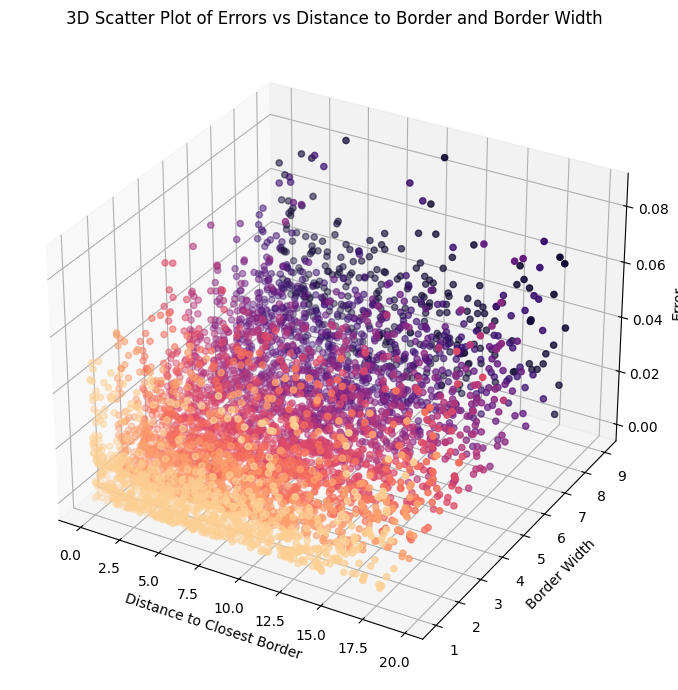

In [18]:
scatter_data = prepare_3d_scatter_data(error_dfs)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

pal = sns.color_palette("magma", len(borders))[::-1]
for i, border in enumerate(error_dfs.keys()):
    ax.scatter(error_dfs[border]['Distance to Closest Border'], [border] * len(error_dfs[border]), error_dfs[border]['Error'], 
           color=pal[i], marker='o')

ax.set_xlabel('Distance to Closest Border')
ax.set_ylabel('Border Width')
ax.set_zlabel('Error')
ax.set_title('3D Scatter Plot of Errors vs Distance to Border and Border Width')
plt.tight_layout()
plt.show()